# Homework 6


## Problem 1 (50pt)
Use ANOVA to test the means of multiple sample sets.

* (a) First, use the following code to generate three sample sets with mean $\mu_1 = \mu_2 = 0$ and $\mu_3 = 0.2$:

([array([ 120.,  101.,  128.,  117.,  108.,  124.,  126.,  130.,   46.,    0.]),
  array([ 102.,  120.,  126.,  132.,  110.,  110.,  147.,  111.,   42.,    0.]),
  array([   0.,   51.,  108.,  121.,  113.,  114.,  123.,  133.,  131.,  106.])],
 array([-0.49990628, -0.37994948, -0.25999268, -0.14003588, -0.02007908,
         0.09987772,  0.21983452,  0.33979132,  0.45974812,  0.57970491,
         0.69966171]),
 <a list of 3 Lists of Patches objects>)

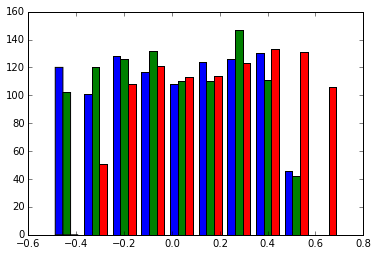

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = 1000 # number of observations
Y1 = ??? # generate n random numbers with mu_1 = 0 
Y2 = ??? # generate n random numbers with mu_2 = 0
Y3 = ??? # generate n random numbers with mu_3 = 0
plt.hist( [Y1, Y2, Y3] , stacked=False)

* (b) Now apply the built-in ANOVA (f-oneway) function from the scipy.stats package to test $\mu_1 = \mu_2 = \mu_3$. Explain the output.

In [2]:
# one way ANOVA
from scipy.stats import f_oneway
??? # look up the usage of f_oneway

F_onewayResult(statistic=147.54888056765049, pvalue=7.6244457038364387e-62)

* (c) Consider the linear model: $y = \mu_1 + (\mu_2-\mu_1)x_1 + (\mu_3-\mu_2)x_2 + \varepsilon$, where $y$ is the observed values from the three sample sets, and $x_1$ and $x_2$ are dummy variables: $x_1 = x_2 = 0$ for the first group, $x_1 = 1, x_2 = 0$ for the second, and $x_1 = x_2 = 1$ for the third. Derive estimators for $\mu_1$, $\mu_2-\mu_1$ and $\mu_3-\mu_2$ using ordinary least square regression. Interpret the model summary and compare results with the above results from "f_oneway": Are the F statistics the same? What values are the parameter estimates? Are these values reasonable?  

In [3]:
import statsmodels.api as sm

# prepare input X
# you should have (3*nobs) data points, 
# the first (nobs) ones are [0,0], 
# the second (nobs) ones are [1,0], 
# and the rest are [1,1]
X = np.vstack((np.array([[0,0]]*n),np.array([[1,0]]*n),np.array([[1,1]]*n)))
X = np.hstack((np.ones((1,3*n)).T,X))

# the response are [Y1, Y2, Y3]
y = np.hstack((Y1,Y2,Y3)).T

# Fit regression model
results = ??? # fit the regression model using sm.OLS

# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 16 Nov 2015   Prob (F-statistic):           7.62e-62
Time:                        22:42:17   Log-Likelihood:                -513.46
No. Observations:                3000   AIC:                             1033.
Df Residuals:                    2997   BIC:                             1051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0141      0.009      1.554      0.1

* (d) Before ANOVA on the same setting as in (a) but with smaller sample sizes (smaller n). How will that change the conclusions?

F_onewayResult(statistic=144.91612569396591, pvalue=8.3934592746252889e-61)

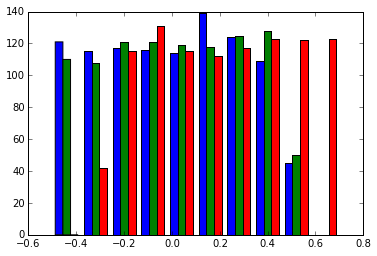

In [4]:
nobs = 10 # number of observations
Y1 = ??? # generate n random numbers with mu_1 = 0 
Y2 = ??? # generate n random numbers with mu_2 = 0
Y3 = ??? # generate n random numbers with mu_3 = 0
plt.hist( [Y1, Y2, Y3] , stacked=False)
??? # run f_oneway again

## Problem 2 (50pt)

* (a) Fit a 2D Rosenbrock function $y = (x_2-\frac{5}{4\pi^2}x_1^2+\frac{5}{\pi}x_1-6)^2 + 10(1-\frac{1}{8\pi})\cos(x_1) +10$ using a polynomial function with 20 random samples within the range $x_1 \in [-5,10], ~x_2 \in [0,15]$.

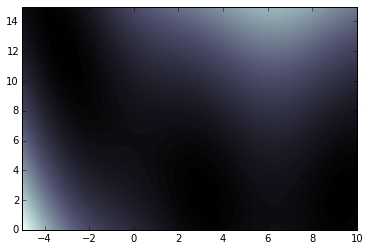

In [50]:
############### plot rosenbrock function in 3d ######################
from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt

X1 = np.linspace(-5, 10, 100)
X2 = np.linspace(0, 15, 100)
x1,x2 = np.meshgrid(X1,X2)
# calculate response according to the rosenbrock function
ytrue = (x2-5./4./np.pi/np.pi*x1**2+5./np.pi*x1-6)**2 + 10.*(1-1./8/np.pi)*np.cos(x1) + 10.
fig = plt.figure()
ax = fig.gca()
ax.contourf(x1, x2, ytrue, 100,
                  cmap=cm.bone,
                  )
plt.show()


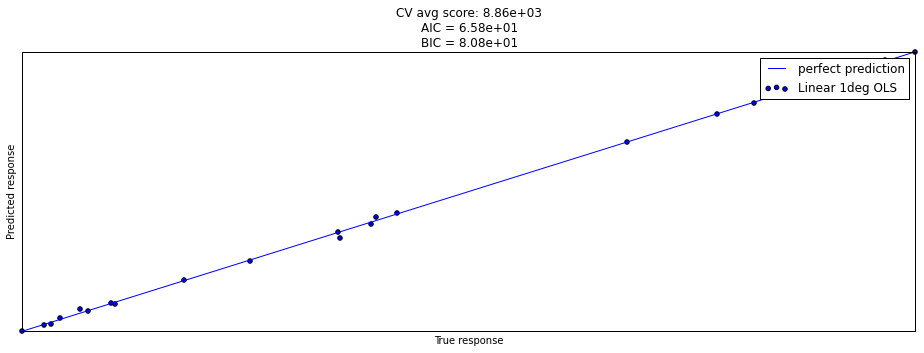

In [57]:
############### get random samples and calculate response ######################
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n = 20
X1 = np.random.rand(n)*15.-5.
X2 = np.random.rand(n)*15.
X = np.vstack((X1,X2)).T

# calculate response according to the rosenbrock function
y = (X[:,1]-5./4./np.pi/np.pi*X[:,0]**2+5./np.pi*X[:,0]-6)**2 + 10.*(1-1./8/np.pi)*np.cos(X[:,0]) + 10.

############### fit a polynomial model ######################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # find the module from sklearn.preprocessing that generates polynomial terms
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from matplotlib import gridspec

# a set of linear models with polynomial terms
degrees = [???] # make a list of all degrees of polynomial models to try
ncv = 10 # 10-fold cv
scores = np.zeros((len(degrees),ncv)) # cv error, for each model type
error = np.zeros(len(degrees))

fig=plt.figure(figsize=(16, 5))

for i in range(len(degrees)):
    
    polynomial = PolynomialFeatures(degree=degrees[i],
                              include_bias=True)
    lin_reg = LinearRegression(fit_intercept=False) # our data has been scaled, no need for intercept

    pipeline = Pipeline([("Polynomial Features", polynomial),
                         ("Linear OLS", lin_reg)])
    pipeline.fit(X,y) # do the regression on the above
    yhat = pipeline.predict(X) #predict prices based on the model

    # Evaluate the models using crossvalidation
    scores[i,] = cross_validation.cross_val_score(pipeline,
        X, y, scoring="mean_squared_error", cv=ncv) # add the new CV scores

    # Calculate the training error
    error[i] = ((yhat - y)**2).sum()

    #### Leave the plotting code as-is ####
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    plt.scatter(y, yhat, label="Linear "+str(i+1)+"deg OLS", clip_on=False)
    plt.title("CV avg score: {:.3}\nAIC = {:.2e}\nBIC = {:.2e}".format(abs(scores[i,].mean()),
              2*polynomial.n_output_features_+error[i], np.log(y.shape[0])*polynomial.n_output_features_+error[i]))

    plt.xlim((min(y), max(y)))
    plt.ylim((min(yhat), max(yhat)))
    plt.plot(range(10000), label="perfect prediction")

    plt.xlabel("True response")
    plt.ylabel("Predicted response")

    plt.legend()

Pick one linear model and get its estimators to be used below.

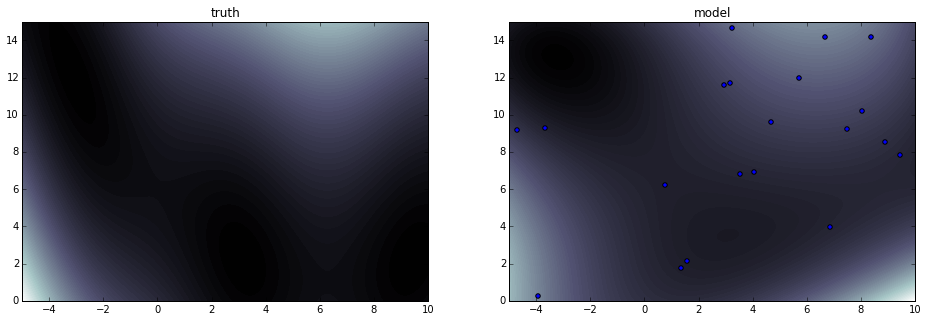

total error = 2.19e+07


In [58]:
############### compare prediction with ground truth ######################
X1all = np.linspace(-5, 10, 100)
X2all = np.linspace(0, 15, 100)
x1,x2 = np.meshgrid(X1all,X2all)

# draw true function
fig=plt.figure(figsize=(16, 5))
ax = plt.subplot(1, 2, 1)
ax.contourf(x1, x2, np.log(np.clip(ytrue, 1, np.inf)), 100,
                  cmap=cm.bone,
                  )
ax.set_title("truth")

# draw predicted function
ax = plt.subplot(1, 2, 2)
# calculate response according to the rosenbrock function
X = np.vstack((x1.flatten(),x2.flatten())).T
yhat = pipeline.predict(X).reshape(x1.shape)
ax.contourf(x1, x2, np.log(np.clip(yhat, 1, np.inf)), 100,
                  cmap=cm.bone,
                  )
ax.set_title("model")
ax.scatter(X1,X2)
ax.set_xlim((-5, 10))
ax.set_ylim((0, 15))

plt.show()

    
error=np.sum((yhat - ytrue)**2)
print 'total squared error = {:.2e}'.format(error)

* (b) Now fit a model with Latin Hypercube samples of the same size

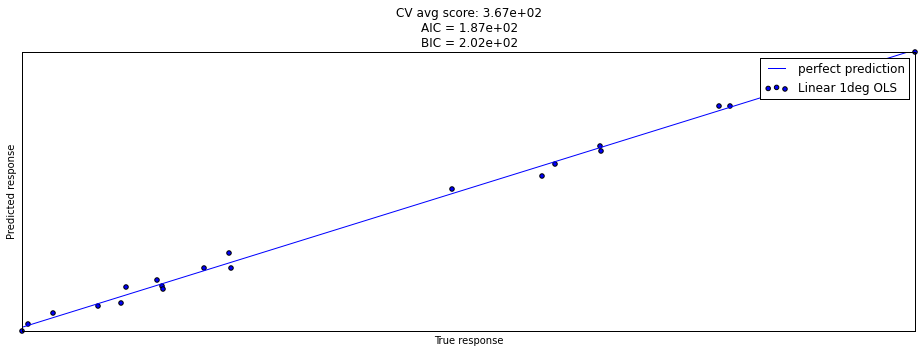

In [60]:
############### get Latin Hypercube samples and calculate response ######################
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pyDOE import lhs # Install pyDOE using DataJoy. 
# If you are using a Python IDE locally, please run the following in command line: pip install pydoe

n = 20
X_lhs = lhs(2, n)
X_lhs[:,0] = X_lhs[:,0]*15.-5.
X_lhs[:,1] = X_lhs[:,1]*15.

# calculate response according to the rosenbrock function
y = (X_lhs[:,1]-5./4./np.pi/np.pi*X_lhs[:,0]**2+5./np.pi*X_lhs[:,0]-6)**2 + 10.*(1-1./8/np.pi)*np.cos(X_lhs[:,0]) + 10.

############### fit a polynomial model ######################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # find the module from sklearn.preprocessing that generates polynomial terms
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from matplotlib import gridspec

# a set of linear models with polynomial terms
degrees = [???] # make a list of all degrees of polynomial models to try
ncv = 10 # 10-fold cv
scores = np.zeros((len(degrees),ncv)) # cv error, for each model type
error = np.zeros(len(degrees))

fig=plt.figure(figsize=(16, 5))

for i in range(len(degrees)):
    
    polynomial = PolynomialFeatures(degree=degrees[i],
                              include_bias=True)
    lin_reg = LinearRegression(fit_intercept=False) # our data has been scaled, no need for intercept

    pipeline = Pipeline([("Polynomial Features", polynomial),
                         ("Linear OLS", lin_reg)])
    pipeline.fit(X_lhs,y) # do the regression on the above
    yhat = pipeline.predict(X_lhs) #predict prices based on the model

    # Evaluate the models using crossvalidation
    scores[i,] = cross_validation.cross_val_score(pipeline,
        X_lhs, y, scoring="mean_squared_error", cv=ncv) # add the new CV scores
    
    # Calculate the training error
    error[i] = ((yhat - y)**2).sum()
    
    #### Leave the plotting code as-is ####
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    plt.scatter(y, yhat, label="Linear "+str(i+1)+"deg OLS", clip_on=False)
    plt.title("CV avg score: {:.3}\nAIC = {:.2e}\nBIC = {:.2e}".format(abs(scores[i,].mean()),
              2*polynomial.n_output_features_+error[i], np.log(y.shape[0])*polynomial.n_output_features_+error[i]))

    plt.xlim((min(y), max(y)))
    plt.ylim((min(yhat), max(yhat)))
    plt.plot(range(10000), label="perfect prediction")
    
    plt.xlabel("True response")
    plt.ylabel("Predicted response")

    plt.legend()

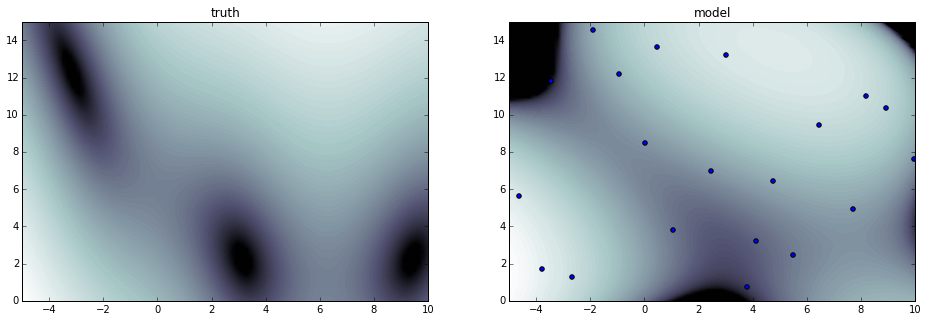

total error = 7.39e+06


In [61]:
############### compare prediction with ground truth ######################
X1all = np.linspace(-5, 10, 100)
X2all = np.linspace(0, 15, 100)
x1,x2 = np.meshgrid(X1all,X2all)

# draw true function
fig=plt.figure(figsize=(16, 5))
ax = plt.subplot(1, 2, 1)
ax.contourf(x1, x2, np.log(np.clip(ytrue, 1, np.inf)), 100,
                  cmap=cm.bone,
                  )
ax.set_title("truth")

# draw predicted function
ax = plt.subplot(1, 2, 2)
# calculate response according to the rosenbrock function
X = np.vstack((x1.flatten(),x2.flatten())).T
yhat = pipeline.predict(X).reshape(x1.shape)
ax.contourf(x1, x2, np.reshape(np.log(np.clip(yhat, 1, np.inf)), x1.shape), 100,
                  cmap=cm.bone,
                  )
ax.set_title("model")
ax.scatter(X_lhs[:,0],X_lhs[:,1])
ax.set_xlim((-5, 10))
ax.set_ylim((0, 15))

plt.show()

error=np.sum((yhat - ytrue)**2)
print 'total squared error = {:.2e}'.format(error)

* (c) Now fit a model with Kriging using Latin Hypercube samples. Tune the Gaussian parameter and observe how it affects the error.

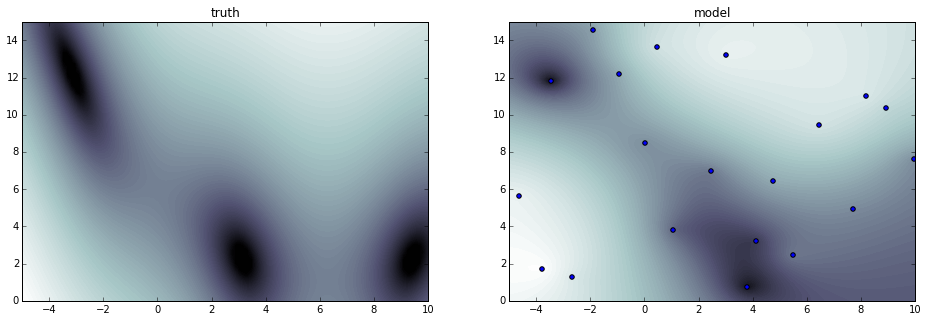

total error = 6.19e+06


In [96]:
############### Kriging ######################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm
from scipy.spatial.distance import pdist, cdist, squareform
from scipy.linalg import pinv2, inv

y = (X_lhs[:,1]-5./4./np.pi/np.pi*X_lhs[:,0]**2+5./np.pi*X_lhs[:,0]-6)**2 + 10.*(1-1./8/np.pi)*np.cos(X_lhs[:,0]) + 10.

def R_ij(X, SI):
    # kernel for non-identity cov. matrix (sigma)
    dists = squareform(pdist(X, 'mahalanobis', VI=SI))
    R = np.exp(-1*dists)
    return R

def r_i(x, X, SI):
    # kernel for non-identity cov. matrix (sigma)
    # X, x must be 2-D!
    if x.size==X.shape[1]:#ensure is 2D
        x = np.array(x, ndmin=2)

    dists = cdist(X, x, 'mahalanobis', VI = SI)
    return np.exp(-1*dists)

def get_b(R,RI,y):
    dim = np.size(y)
    ones = np.ones(dim)
    num = ones.T.dot(RI.dot(y))
    den = ones.T.dot(R.dot(ones))
    return num/den

def ypred(x, X, y, SI):
    # the kriging surface for given X,y
    r = r_i(x, X, SI)
    return b + r.T.dot(RI.dot(np.subtract(y, b)))

X1all = np.linspace(-5, 10, 100)
X2all = np.linspace(0, 15, 100)
x1,x2 = np.meshgrid(X1all,X2all)

SI = np.diag(np.ones(2)*???) # tune the guassian parameter and observe how it affects the error 
R = R_ij(X_lhs, SI)
RI = pinv2(R)
b = get_b(R,RI,y)

yhat = np.zeros(x1.flatten().shape[0])
for i in np.arange(x1.flatten().shape[0]):
    yhat[i] = ypred(np.array([x1.flatten()[i],x2.flatten()[i]]),X_lhs,y,SI)

# draw true function
fig=plt.figure(figsize=(16, 5))
ax = plt.subplot(1, 2, 1)
ax.contourf(x1, x2, np.log(np.clip(ytrue, 1, np.inf)), 100,
                  cmap=cm.bone,
                  )
ax.set_title("truth")

# draw predicted function
ax = plt.subplot(1, 2, 2)
# calculate response according to the rosenbrock function
X = np.vstack((x1.flatten(),x2.flatten())).T
ax.contourf(x1, x2, np.reshape(np.log(np.clip(yhat, 1, np.inf)), x1.shape), 100,
                  cmap=cm.bone,
                  )
ax.set_title("model")
ax.scatter(X_lhs[:,0],X_lhs[:,1])
ax.set_xlim((-5, 10))
ax.set_ylim((0, 15))

plt.show()

error=np.sum((yhat.reshape(x1.shape) - ytrue)**2)
print 'total squared error = {:.2e}'.format(error)